# Customer Churn Dataset

The intial work surrounded loading the data, analyzing the data and preparing the attibiutes that would be used for modeling.

# PART 1 - Data Preparation and Pre-prediction Analysis

## A) Initial data load

In [1]:
#Import Required Libraries

#numpy and pandas for data investigation and cleanup
import numpy as np
import pandas as pd

#pprint
import pprint

#matplotlib and seaborn for visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

#sklearn for machine learning
from sklearn import tree
#from c.linear_model import LogisticRegression
#from sklearn.svm import SVC, LinearSVC
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.tree import DecisionTreeClassifier












In [2]:
#Import the customer_churn.csv dataset
df = pd.read_csv('customer_churn.csv')

#Verify import was successful and check for missing values
#Confirmed and there is no missing data
df.info()

#See column names
#print(df.columns.values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


## B) What are the attribute type? (e.g. categorical, ordinal or quantitative) 

In [3]:
#Preview the data, to determine types
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


__What are the categorical attributes?__

Categorical: State, Area Code, Phone, Int'l Plan (binary), VMail Message (binary), Churn (class variable). 

__What are the numerical attributes?__ 

Continous: Account Length, Day Mins, Day Charge, Eve Mins, Eve Charge, Night Mins, Night Charge, Intl Mins, Intl Charge
Discrete: VMail Message, Day Calls, Eve Calls, Night Calls, Intl Calls, CustServ Calls

# C) Find the max, min, mean and standard deviation of each attribute

Use describe to first gather this data for the categorical values and convert area code to object as this field is not numeric.

In [4]:
df['Area Code'] = df['Area Code'].astype(object)
df.describe(include=['O'])



,State,Area Code,Phone,Int'l Plan,VMail Plan,Churn?
count,3333,3333,3333,3333,3333,3333
unique,51,3,3333,2,2,2
top,WV,415,381-2745,no,no,False.
freq,106,1655,1,3010,2411,2850


Use describe again to this time gather the data for numerical values.

In [5]:
df.describe()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


 As was shown phone is all unique values and can be removed from the data frame. Also decided to create dummy variables for the binary attributes.

In [6]:
df.drop('Phone', axis=1, inplace=True)
#df.drop('VMail Message', axis=1, inplace=True)

In [7]:
df['Int\'l Plan'] = df['Int\'l Plan'].map( {'yes': 1, 'no': 0} ).astype(int)
df['VMail Plan'] = df['VMail Plan'].map( {'yes': 1, 'no': 0} ).astype(int)
df['Churn?'] = df['Churn?'].map( {'True.': 1, 'False.': 0} ).astype(int)
df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# D) Are there any outlier values (records) for each of the attributes ?

The box plot shows that some attributes (acc len, calls, mins, charges) have a quite a few outliers. This is most likely due to this data not being a full dataset and the nature of this data is most likely influenced by the pareto principle. 

In this case it makes sense to consolidate the fields calls, mins, charges. Also makes sense to bin the data and then see if there is any relation to the class variable. 

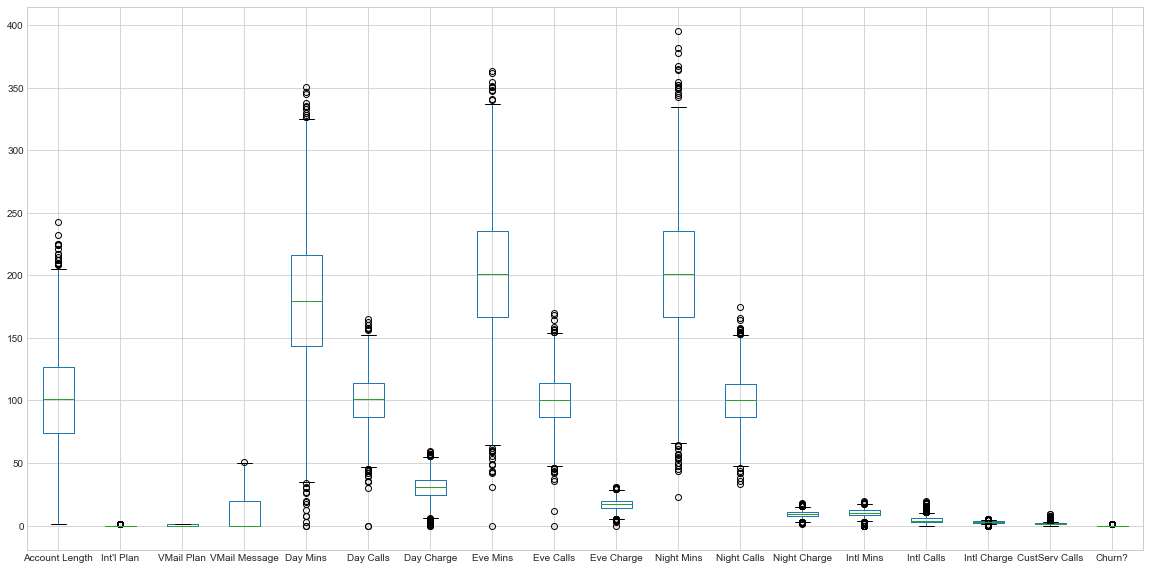

In [8]:
#Use boxplot to see if there are any outlier values
df.boxplot(figsize=(20,10))

## E) Analyze the distribution of numeric attributes (normal or other) 

As noted above it made sense to consolidate min, calls, and charges. This was done before plotting the distributions

In [9]:
#Group the day, eve, night data into total calls, total charges and total mins to simplify distribution plots
df['Total Mins Non-Intl'] = df['Day Mins'] + df['Eve Mins'] + df['Night Mins']
df['Total Calls Non-Intl'] = df['Day Calls'] + df['Eve Calls'] + df['Night Calls']
df['Total Charge Non-Intl'] = df['Day Charge'] + df['Eve Charge'] + df['Night Charge']

#Create a new columns for combined totals  (non-intl and intl)
df['Total Mins'] = df['Total Mins Non-Intl'] + df['Intl Mins']
df['Total Calls'] = df['Total Calls Non-Intl'] + df['Intl Calls']
df['Total Charge'] = df['Total Charge Non-Intl'] + df['Intl Charge']
#df.head()

__Account Length__ - Normally distributed

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


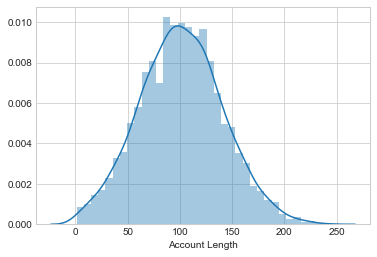

In [10]:
#Account Length, Day Mins, Day Charge, Eve Mins, Eve Charge, Night Mins, Night Charge, Intl Mins, Intl Charge Discrete: VMail Message, Day Calls, Eve Calls, Night Calls, Intl Calls, CustServ Calls
sns.distplot(df["Account Length"])


__CustServ Calls__ - Not normally dist and should be converted to a binary value

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


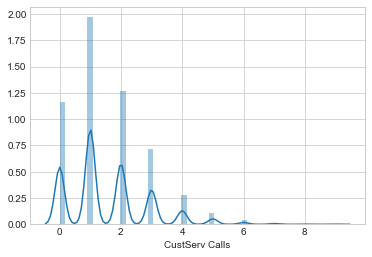

In [11]:
sns.distplot(df["CustServ Calls"])

__VMail Message__ - Was not normally dist and should be converted to a binary value. Basically the same as VMail Plan so it was dropped.

In [12]:
#sns.distplot(df["VMail Message"])

__Mins__ - Normally distributed

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


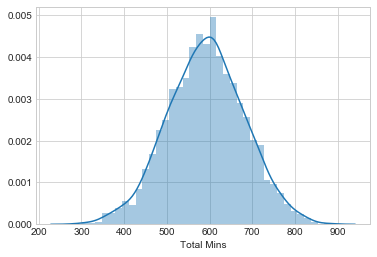

In [13]:
sns.distplot(df["Total Mins"])

__Calls__ - Normally distributed

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


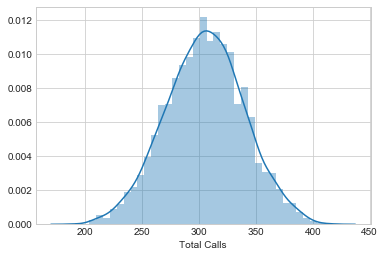

In [14]:
sns.distplot(df["Total Calls"])

__Charge__ - Normally distributed

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


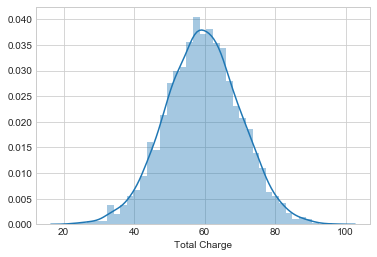

In [15]:
sns.distplot(df["Total Charge"])

## F) Analyze  attributes and determine if they have any influence on the class

Before starting this analysis the account length was binned. Skipped binning each individual min, call, charge coloumn and focused on the the overall totals. 

In [16]:
#Bin account length 
binwidth_al = int((max(df['Account Length'])-min(df['Account Length']))/5)
bins_al = range(min(df['Account Length']), max(df['Account Length']), binwidth_al)
al_names = ['Newest', 'Avg', "Oldest"]
df['Acc Length Binned'] = pd.cut(df['Account Length'], bins_al)

#Convert total mins to int so it can be binned
df['Total Mins'] = df['Total Mins'].astype(np.int64)
#Bin Total Mins 
binwidth_tm = int((max(df['Total Mins'])-min(df['Total Mins']))/6)
bins_tm = range(min(df['Total Mins']), max(df['Total Mins']), binwidth_tm)

df['Total Mins Binned'] = pd.cut(df['Total Mins'], bins_tm)

#Convert total Calls to int so it can be binned
df['Total Calls'] = df['Total Calls'].astype(np.int64)
#Bin Total Calls 
binwidth_tc = int((max(df['Total Calls'])-min(df['Total Calls']))/6)
bins_tc = range(min(df['Total Calls']), max(df['Total Calls']), binwidth_tc)
df['Total Calls Binned'] = pd.cut(df['Total Calls'], bins_tc)

#Convert total Calls to int so it can be binned
df['Total Charge'] = df['Total Charge'].astype(np.int64)
#Bin Total Calls 
binwidth_tch = int((max(df['Total Charge'])-min(df['Total Charge']))/6)
bins_tch = range(min(df['Total Charge']), max(df['Total Charge']), binwidth_tch)
df['Total Charge Binned'] = pd.cut(df['Total Charge'], bins_tch)

df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Total Mins Non-Intl,Total Calls Non-Intl,Total Charge Non-Intl,Total Mins,Total Calls,Total Charge,Acc Length Binned,Total Mins Binned,Total Calls Binned,Total Charge Binned
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,707.2,300,72.86,717,303,75,"(97, 145]","(684, 784]","(302, 339]","(70, 82]"
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,611.5,329,55.54,625,332,59,"(97, 145]","(584, 684]","(302, 339]","(58, 70]"
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,527.2,328,59.00,539,333,62,"(97, 145]","(484, 584]","(302, 339]","(58, 70]"
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,558.2,248,65.02,564,255,66,"(49, 97]","(484, 584]","(228, 265]","(58, 70]"
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,501.9,356,49.36,512,359,52,"(49, 97]","(484, 584]","(339, 376]","(46, 58]"


__State__ - Some states are more likely to result in churn but there is no strong correlation visible . It can be dropped.

In [17]:
df[['State', 'Churn?']].groupby(['State'], as_index=False).mean().sort_values(by='Churn?', ascending=False)

,State,Churn?
31,NJ,0.264706
4,CA,0.264706
43,TX,0.250000
20,MD,0.242857
40,SC,0.233333
22,MI,0.219178
25,MS,0.215385
33,NV,0.212121
47,WA,0.212121
21,ME,0.209677


__Acc Length Binned__ - No real difference shown. It can be dropped.

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


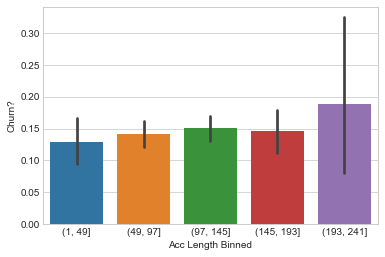

In [18]:
sns.barplot(x='Acc Length Binned', y='Churn?', data=df)

__Area Code__ - No predictive power. It can be dropped

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


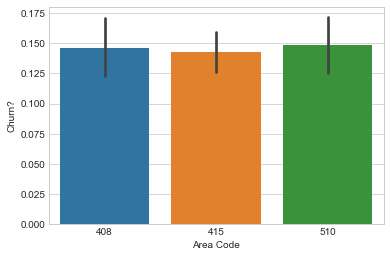

In [19]:
#df[['Area Code', 'Churn?']].groupby(['Area Code'], as_index=False).mean().sort_values(by='Churn?', ascending=False)
sns.barplot(x='Area Code', y='Churn?', data=df)

__Intl Plan__ - If customer has international plan, they are more likely to churn. Keep attribute.

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


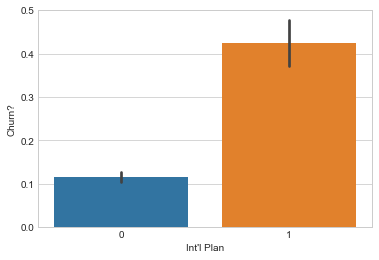

In [20]:
sns.barplot(x='Int\'l Plan', y='Churn?', data=df)

__VMail Plan__ - No Voicemail plan does increase chance of churn slightly. Keep for now, but it can be removed later on from model.

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


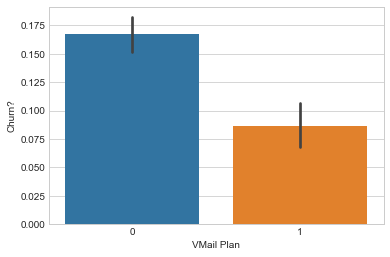

In [21]:
sns.barplot(x='VMail Plan', y='Churn?', data=df)

__Total Mins Binned__ - Minutes don't appear to influence churn as the outcome is fairly random. Will drop field based on this and fact there are a high number of outliers previously identified for this attribute. 

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


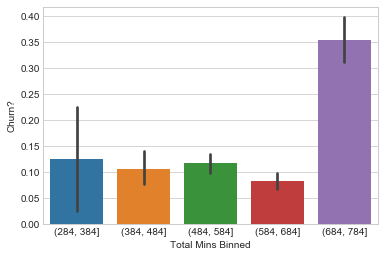

In [22]:
sns.barplot(x='Total Mins Binned', y='Churn?', data=df)

__Total Calls Binned__ - Total Calls doesn't appear to influence the class attribute. Will drop field based on this and fact there are a high number of outliers previously identified for this attribute. 

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


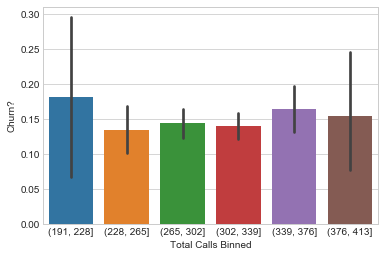

In [23]:
sns.barplot(x='Total Calls Binned', y='Churn?', data=df)

__Total Charge Binned__ - Customer is more likely to churn if their charge is high. Create a feature if charge >80 (y/n)

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


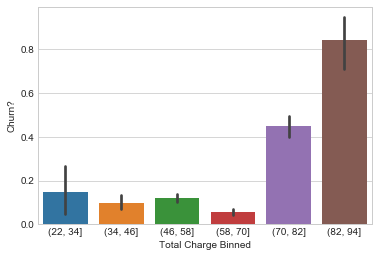

In [24]:
sns.barplot(x='Total Charge Binned', y='Churn?', data=df)

In [25]:
#Create new feature
df['Total Charge > 80'] = df['Total Charge'].apply(lambda x: 1 if x >80 else 0)

__CustServ Calls__ - The more calls equals a much greater chance of churn. Greater than 3 looks like a strong indicator. Create new feature based on this.

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


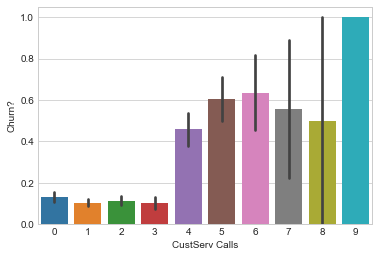

In [26]:
sns.barplot(x='CustServ Calls', y='Churn?', data=df)

In [27]:
#Create new feature
df['CustServ Calls >3'] = df['CustServ Calls'].apply(lambda x: 1 if x >3 else 0)
#df.info()

## G) Final Clean-up

Above there has already been some data clean up such as removing attributes not needed and coverting categorical data to numerical values. In this section anything remaining before data is used for modeling is completed

Remove columns that are not needed (identified in part f)

In [28]:
#df.drop('State', axis=1, inplace=True)
df.drop('Account Length', axis=1, inplace=True)
df.drop('Area Code', axis=1, inplace=True)
df.drop('Day Mins', axis=1, inplace=True)
df.drop('Day Calls', axis=1, inplace=True)
df.drop('Day Charge', axis=1, inplace=True)
df.drop('Eve Mins', axis=1, inplace=True)
df.drop('Eve Calls', axis=1, inplace=True)
df.drop('Eve Charge', axis=1, inplace=True)
df.drop('Night Mins', axis=1, inplace=True)
df.drop('Night Calls', axis=1, inplace=True)
df.drop('Night Charge', axis=1, inplace=True)
df.drop('Intl Mins', axis=1, inplace=True)
df.drop('Intl Calls', axis=1, inplace=True)
df.drop('Intl Charge', axis=1, inplace=True)
df.drop('Total Mins Non-Intl', axis=1, inplace=True)
df.drop('Total Calls Non-Intl', axis=1, inplace=True)
df.drop('Total Charge Non-Intl', axis=1, inplace=True)
df.drop('Total Mins', axis=1, inplace=True)
df.drop('Total Calls', axis=1, inplace=True)
#df.drop('Total Charge', axis=1, inplace=True)
df.drop('Acc Length Binned', axis=1, inplace=True)
df.drop('Total Mins Binned', axis=1, inplace=True)
df.drop('Total Calls Binned', axis=1, inplace=True)
df.drop('Total Charge Binned', axis=1, inplace=True)
df.drop('CustServ Calls', axis=1, inplace=True)


There are now 7 features to use for modeling after investigating which attributes can influence the class variable and then removing the ones are unrelated. 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 8 columns):
State                3333 non-null object
Int'l Plan           3333 non-null int32
VMail Plan           3333 non-null int32
VMail Message        3333 non-null int64
Churn?               3333 non-null int32
Total Charge         3333 non-null int64
Total Charge > 80    3333 non-null int64
CustServ Calls >3    3333 non-null int64
dtypes: int32(3), int64(4), object(1)
memory usage: 169.3+ KB


Finally for each newly created attibute used determine churn, group by and take a count of no churn.churn to see size of each influencer and confirm it should still be included. Would have exluded if attributes were highly weighted to either no churn or churn. 

In [30]:
df_groupby2 = (df.groupby(['Int\'l Plan'])['Churn?'].agg('count'))
df_groupby2 

Int'l Plan
0    3010
1     323
Name: Churn?, dtype: int64

In [31]:
df_groupby2 = (df.groupby(['VMail Plan'])['Churn?'].agg('count'))
df_groupby2 

VMail Plan
0    2411
1     922
Name: Churn?, dtype: int64

In [32]:
df_groupby2 = (df.groupby(['Total Charge > 80'])['Churn?'].agg('count'))
df_groupby2 

Total Charge > 80
0    3266
1      67
Name: Churn?, dtype: int64

In [33]:
df_groupby2 = (df.groupby(['CustServ Calls >3'])['Churn?'].agg('count'))
df_groupby2 

CustServ Calls >3
0    3066
1     267
Name: Churn?, dtype: int64

## H) Three way data split (training 60%, validation 20%, test 20%)

The function below takes the dataframe and does a three way split based on provided percentges. It also randomizes the index so that the output is a random sample. 

In [34]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.ix[perm[:train_end]]
    validate = df.ix[perm[train_end:validate_end]]
    test = df.ix[perm[validate_end:]]
    return train, validate, test

np.random.seed([3,1415])

train, validate, test = train_validate_test_split(df)

C:\Users\benpo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\benpo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\benpo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 373 to 2237
Data columns (total 8 columns):
State                668 non-null object
Int'l Plan           668 non-null int32
VMail Plan           668 non-null int32
VMail Message        668 non-null int64
Churn?               668 non-null int32
Total Charge         668 non-null int64
Total Charge > 80    668 non-null int64
CustServ Calls >3    668 non-null int64
dtypes: int32(3), int64(4), object(1)
memory usage: 39.1+ KB


In [36]:
df.to_csv("customer _churn_processed.csv", sep=',', encoding='utf-8')

# PART 2 - Predictive Modeling (Classification)

# DECISION TREE

## A) Read partially processed file from earlier analysis and review included variables

In [37]:
# import dataset 

df = pd.read_csv("customer _churn_processed.csv") 


#Verify import was successful and check for missing values
#Confirmed and there is no missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 9 columns):
Unnamed: 0           3333 non-null int64
State                3333 non-null object
Int'l Plan           3333 non-null int64
VMail Plan           3333 non-null int64
VMail Message        3333 non-null int64
Churn?               3333 non-null int64
Total Charge         3333 non-null int64
Total Charge > 80    3333 non-null int64
CustServ Calls >3    3333 non-null int64
dtypes: int64(8), object(1)
memory usage: 234.4+ KB


## B) Confirm relative frequency of churn in the dataset  
The results of the analysis show an imbalance of churn versus non-churn 

In [38]:

df_groupby = (df.groupby(['Churn?'])['Churn?'].agg('count'))

print (df_groupby)
print ("Churn rate - ",483/(2850+483))

Churn?
0    2850
1     483
Name: Churn?, dtype: int64
Churn rate -  0.14491449144914492


## C) List the names of columns for easy later reference

In [39]:
# create list with column names 

col_nm = list(df.columns.values)

print (col_nm)

['Unnamed: 0', 'State', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Churn?', 'Total Charge', 'Total Charge > 80', 'CustServ Calls >3']


In [40]:
## Create dummy variables for state to feed into decision tree 

s = df['State']
state_dummies = pd.get_dummies(s)

## D) Concatenate state_dummies with main df and drop original state variable 

In [41]:

df = pd.concat([df,state_dummies], axis=1, sort=False)
df.drop('State',  axis=1, inplace=True)
df.drop('Unnamed: 0',  axis=1, inplace=True)


In [42]:
# Create train, test and validation data sets (60,20,20)
# note generates and error but works fine 

def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.ix[perm[:train_end]]
    validate = df.ix[perm[train_end:validate_end]]
    test = df.ix[perm[validate_end:]]
    return train, validate, test

np.random.seed([3,1415])

train, validate, test = train_validate_test_split(df)

C:\Users\benpo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
C:\Users\benpo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\benpo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  i

## E) Confirm the split took place correctly.

In [43]:
# confirm split 
print(test.describe())
print(train.describe())
print(validate.describe())

       Int'l Plan  VMail Plan  VMail Message      Churn?  Total Charge  \
count  668.000000  668.000000     668.000000  668.000000    668.000000   
mean     0.109281    0.255988       7.492515    0.149701     59.008982   
std      0.312226    0.436742      13.220819    0.357045     10.372951   
min      0.000000    0.000000       0.000000    0.000000     25.000000   
25%      0.000000    0.000000       0.000000    0.000000     52.000000   
50%      0.000000    0.000000       0.000000    0.000000     58.000000   
75%      0.000000    1.000000      15.000000    0.000000     66.000000   
max      1.000000    1.000000      45.000000    1.000000     92.000000   

       Total Charge > 80  CustServ Calls >3          AK          AL  \
count         668.000000         668.000000  668.000000  668.000000   
mean            0.016467           0.062874    0.014970    0.023952   
std             0.127358           0.242919    0.121524    0.153015   
min             0.000000           0.000000    0.

## F) Create separate target vector to feed into the algorithm.

In [44]:
# create separate arrays for target variable 


train_target = train['Churn?']
test_target = test['Churn?']
validate_target = validate['Churn?']


# delete target variable from train and test  dataframes

train = train.drop('Churn?',1)
test = test.drop('Churn?',1)
validate = validate.drop('Churn?',1)

## G) Import decision tree and fit model 
#importing other algorithms is very similar 

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import tree
from sklearn.model_selection import train_test_split


tree = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=None, min_samples_split=5, 
                              min_samples_leaf=10, min_weight_fraction_leaf=0.0,  random_state=0, 
                              max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None,
                              presort=False)

tree.fit (train,train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [46]:
# Score train data set 

In [47]:
# Output model scores for test

test_pred =  tree.predict(test)

In [48]:
# Calculate model evaluation metrics 


from sklearn.metrics import precision_recall_fscore_support as score 
from sklearn.metrics import accuracy_score
precision, recall, fscore, support = score(test_target, test_pred) 


precision = ('precision: {}'.format(precision)) 
recall = ('recall: {}'.format(recall)) 
fscore = ('fscore: {}'.format(fscore)) 
support = ('support: {}'.format(support))
accuracy = accuracy_score(test_target, test_pred, normalize=True)

output = {accuracy, precision, recall, fscore, support}
output

{0.938622754491018,
 'fscore: [0.96480687 0.76023392]',
 'precision: [0.94137353 0.91549296]',
 'recall: [0.98943662 0.65      ]',
 'support: [568 100]'}

In [49]:
# Create confusion matrix

In [50]:
df_confusion = pd.crosstab(test_target, test_pred)
print (df_confusion)

col_0     0   1
Churn?         
0       562   6
1        35  65


In [51]:
# Use grid search to improve performance 

In [52]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import GridSearchCV


parameters = {'min_samples_split':np.arange(2, 80), 'max_depth': np.arange(2,10), 'criterion':['gini', 'entropy']}
tree = DecisionTreeClassifier()
grid = GridSearchCV(tree, parameters,scoring='accuracy', cv=8)

grid.fit(train, train_target)
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', grid.best_score_)

The parameters combination that would give best accuracy is : 
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 37}
The best accuracy achieved after parameter tuning via grid search is :  0.9464732366183092


In [53]:
# enter optimized hyperparameters

In [54]:
tree2 = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=3, min_samples_split=5, 
                              min_samples_leaf=5, min_weight_fraction_leaf=0.0,  random_state=0, 
                              max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None,
                              presort=False)

tree2.fit (train,train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [55]:
#rescore test with updated hyperparameters 


test_pred2 =  tree2.predict(test)

In [56]:
#recheck metrics based on grid search based hyperparameter settings 

precision, recall, fscore, support = score(test_target, test_pred2) 

precision = ('precision: {}'.format(precision)) 
recall = ('recall: {}'.format(recall)) 
fscore = ('fscore: {}'.format(fscore)) 
support = ('support: {}'.format(support))
accuracy = accuracy_score(test_target, test_pred2, normalize=True)

output = {accuracy, precision, recall, fscore, support}
output

{0.9446107784431138,
 'fscore: [0.96834902 0.77844311]',
 'precision: [0.94176373 0.97014925]',
 'recall: [0.99647887 0.65      ]',
 'support: [568 100]'}

In [57]:
# create confusion matrix for optimized algorithm  

df_confusion = pd.crosstab(test_target, test_pred2)
print (df_confusion)

col_0     0   1
Churn?         
0       566   2
1        35  65


In [58]:
# code below to check model performance on validate - not currently working

In [59]:
estimator = tree2.fit (train,train_target)
validate_pred2 =  tree2.predict(validate)
precision, recall, fscore, support = score(validate_target, validate_pred2) 

precision = ('precision: {}'.format(precision)) 
recall = ('recall: {}'.format(recall)) 
fscore = ('fscore: {}'.format(fscore)) 
support = ('support: {}'.format(support))
accuracy = accuracy_score(test_target, test_pred2, normalize=True)

final_output = {accuracy, precision, recall, fscore, support}
final_output

{0.9446107784431138,
 'fscore: [0.97792869 0.83116883]',
 'precision: [0.95840266 0.98461538]',
 'recall: [0.9982669  0.71910112]',
 'support: [577  89]'}

# NAIVE BAYES

Now on to the second classification model naive bayes

In [60]:
#verify categorical data converted to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 58 columns):
Int'l Plan           3333 non-null int64
VMail Plan           3333 non-null int64
VMail Message        3333 non-null int64
Churn?               3333 non-null int64
Total Charge         3333 non-null int64
Total Charge > 80    3333 non-null int64
CustServ Calls >3    3333 non-null int64
AK                   3333 non-null uint8
AL                   3333 non-null uint8
AR                   3333 non-null uint8
AZ                   3333 non-null uint8
CA                   3333 non-null uint8
CO                   3333 non-null uint8
CT                   3333 non-null uint8
DC                   3333 non-null uint8
DE                   3333 non-null uint8
FL                   3333 non-null uint8
GA                   3333 non-null uint8
HI                   3333 non-null uint8
IA                   3333 non-null uint8
ID                   3333 non-null uint8
IL                   3333 non-nu

## A) Gaussian Model

In [61]:
#import library for Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB, BernoulliNB 

#set the classifier
gnb = GaussianNB()

#set features
used_features = ["Int'l Plan", "VMail Plan", "Total Charge > 80", "CustServ Calls >3"]

In [62]:
#train classifier
gnb.fit(train[used_features].values, train_target)

response_var = gnb.predict(validate[used_features])

#print results

print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%."
      .format(
          test.shape[0],
          (validate_target != response_var).sum(),
          100*(1-(validate_target != response_var).sum()/test.shape[0])))

Number of mislabeled points out of a total 668 points : 91, performance 86.38%.


In [63]:
#import libraries for model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [64]:
#model evaluation
print(metrics.classification_report(validate_target, response_var))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       577
           1       0.49      0.61      0.54        89

   micro avg       0.86      0.86      0.86       666
   macro avg       0.71      0.75      0.73       666
weighted avg       0.88      0.86      0.87       666



In [65]:
#confusion matrix
print(metrics.confusion_matrix(validate_target, response_var))

[[521  56]
 [ 35  54]]


C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


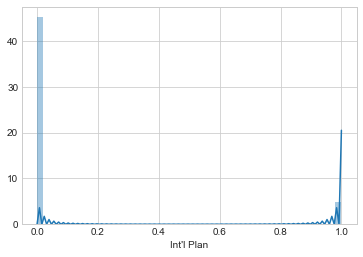

In [66]:
# consider the distribution of the features

sns.distplot(df["Int'l Plan"])

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


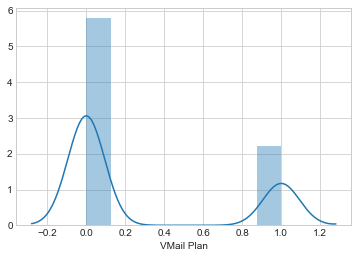

In [67]:
sns.distplot(df["VMail Plan"])

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


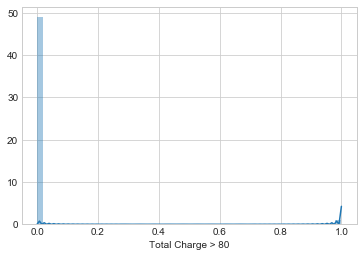

In [68]:
sns.distplot(df["Total Charge > 80"])

C:\Users\benpo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


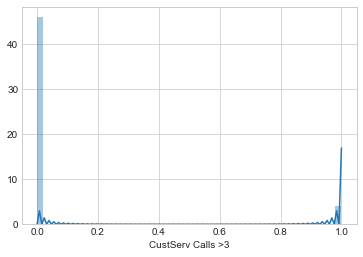

In [69]:
sns.distplot(df["CustServ Calls >3"])

## B) Bernoulli

Our selected features are 1s and 0s. Lets try the Bernoulli model.

In [70]:
#set the classifier
bnb = BernoulliNB()

bnb.fit(train[used_features].values, train_target)

bnb_response_var = bnb.predict(validate[used_features])

#print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%."
      .format(
          test.shape[0],
          (validate_target != bnb_response_var).sum(),
          100*(1-(validate_target != bnb_response_var).sum()/test.shape[0])))

Number of mislabeled points out of a total 668 points : 80, performance 88.02%.


In [71]:
#model evaluation
print(metrics.classification_report(validate_target, bnb_response_var))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       577
           1       0.74      0.16      0.26        89

   micro avg       0.88      0.88      0.88       666
   macro avg       0.81      0.57      0.60       666
weighted avg       0.86      0.88      0.84       666



In [72]:
#confusion matrix
print(metrics.confusion_matrix(validate_target, bnb_response_var))

[[572   5]
 [ 75  14]]


## C) Model Selection

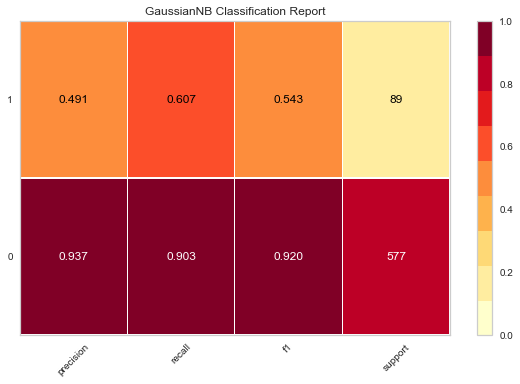

In [74]:
#Gaussian Classification Report
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(gnb,support=True)

visualizer.fit(train[used_features], train_target)  # Fit the visualizer and the model
visualizer.score(validate[used_features], validate_target)  # Evaluate the model on the test data
g = visualizer.poof()  

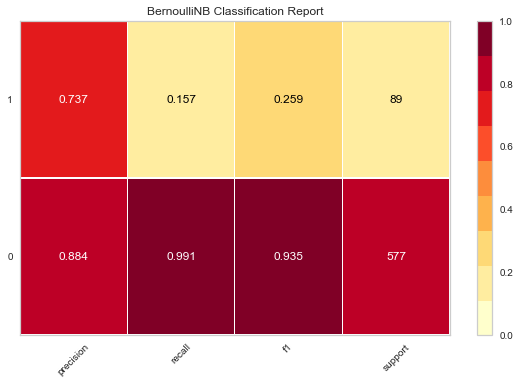

In [75]:
#Bernoulli Classification Report
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(bnb,support=True)

visualizer.fit(train[used_features], train_target)  # Fit the visualizer and the model
visualizer.score(validate[used_features], validate_target)  # Evaluate the model on the test data
g = visualizer.poof()  

## D) Bernoulli and the Test Set

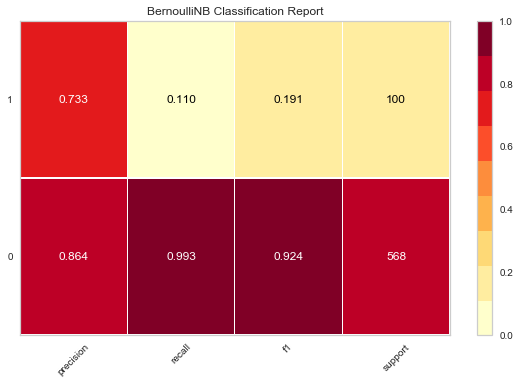

In [76]:
#Classification Report
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(bnb,support=True)

visualizer.fit(train[used_features], train_target)  # Fit the visualizer and the model
visualizer.score(test[used_features], test_target)  # Evaluate the model on the test data
g = visualizer.poof()  

In [77]:
bnb.fit(train[used_features].values, train_target)

bnb_predicted_test = bnb.predict(test[used_features])

#print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%."
      .format(
          test.shape[0],
          (test_target != bnb_predicted_test).sum(),
          100*(1-(test_target != bnb_predicted_test).sum()/test.shape[0])))

Number of mislabeled points out of a total 668 points : 93, performance 86.08%.


# RANDOM FOREST

The third and final model considered was random forest.

In [78]:
from sklearn.ensemble import RandomForestClassifier

## A) Initilize Random Forest Classifier & Initial fit

In [79]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, min_samples_split=19, 
       min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
       min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False,
       n_jobs=None, random_state=42, verbose=0, warm_start=False, class_weight=None)

In [80]:
rf.fit(train, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=19,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [81]:
test_pred = rf.predict(test)

## B) Instantiate performace metrics

In [82]:
precision, recall, fscore, support = score(test_target, test_pred)
precision = ('precision: {}'.format(precision)),
recall = ('recall: {}'.format(recall)),
fscore = ('fscore: {}'.format(fscore)),
support = ('support: {}'.format(support)),
accuracy = accuracy_score(test_target, test_pred, normalize=True)
output = {accuracy, precision, recall, fscore, support}
output

C:\Users\benpo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{('fscore: [0.91909385 0.        ]',),
 ('precision: [0.8502994 0.       ]',),
 ('recall: [1. 0.]',),
 ('support: [568 100]',),
 0.8502994011976048}

In [83]:
df_confusion = pd.crosstab(test_target, test_pred)
print (df_confusion)

col_0     0
Churn?     
0       568
1       100


In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
precision, recall, fscore, support = score(test_target, test_pred) 
precision = ('precision: {}'.format(precision)) 
recall = ('recall: {}'.format(recall)) 
fscore = ('fscore: {}'.format(fscore)) 
support = ('support: {}'.format(support))
accuracy = accuracy_score(test_target, test_pred, normalize=True)

output = {accuracy, precision, recall, fscore, support}
output

C:\Users\benpo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{0.8502994011976048,
 'fscore: [0.91909385 0.        ]',
 'precision: [0.8502994 0.       ]',
 'recall: [1. 0.]',
 'support: [568 100]'}

In [86]:
print(df_confusion)

col_0     0
Churn?     
0       568
1       100


## C) Grid Search for optimized parameters

In [87]:
parameters = {#'n_estimators': [500,1000,1500,2000],
             'max_features': ['auto', 'sqrt', 'log2', .9, .2],
             'max_depth': [2,4,6,8,10],
             'criterion':['gini','entropy'],
             # 'boostrap': [True, False],
              'min_samples_leaf':[1,2,3]
             }
rand_for = RandomForestClassifier()
grid = GridSearchCV(rf, parameters, scoring='accuracy', cv=4)
grid.fit(train, train_target)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=19,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', 0.9, 0.2], 'max_depth': [2, 4, 6, 8, 10], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

The optimized parameters are:

In [88]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 0.9, 'min_samples_leaf': 1}
0.9449724862431216


## D) Insert new parameters. Fit & Train Model

In [102]:
rf = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=6, min_samples_split=2, 
       min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features=0.9, max_leaf_nodes=None,
       min_impurity_decrease=0.0, min_impurity_split=None, bootstrap='auto', oob_score=False,
       n_jobs=None, random_state=42, verbose=0, warm_start=False, class_weight=None)
rf.fit(train,train_target)

RandomForestClassifier(bootstrap='auto', class_weight=None, criterion='gini',
            max_depth=6, max_features=0.9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [103]:
rf_pred = rf.predict(test)

## E) Re-test performance metrics

In [104]:
precision, recall, fscore, support = score(test_target, rf_pred) 

precision = ('precision: {}'.format(precision)) 
recall = ('recall: {}'.format(recall)) 
fscore = ('fscore: {}'.format(fscore)) 
support = ('support: {}'.format(support))
accuracy = accuracy_score(test_target, rf_pred, normalize=True)

output = {accuracy, precision, recall, fscore, support}
output

{0.9446107784431138,
 'fscore: [0.96829477 0.78106509]',
 'precision: [0.94323873 0.95652174]',
 'recall: [0.99471831 0.66      ]',
 'support: [568 100]'}

In [105]:
df_confusion = pd.crosstab(test_target, rf_pred)
print (df_confusion)

col_0     0   1
Churn?         
0       565   3
1        34  66


## F) Evaluate performance on validation set

In [106]:
rf_pred = rf.predict(validate)
precision, recall, fscore, support = score(validate_target, rf_pred) 
precision = ('precision: {}'.format(precision)) 
recall = ('recall: {}'.format(recall)) 
fscore = ('fscore: {}'.format(fscore)) 
support = ('support: {}'.format(support))
accuracy = accuracy_score(validate_target, rf_pred, normalize=True)
output = {accuracy, precision, recall, fscore, support}
output

{0.960960960960961,
 'fscore: [0.97792869 0.83116883]',
 'precision: [0.95840266 0.98461538]',
 'recall: [0.9982669  0.71910112]',
 'support: [577  89]'}

In [107]:
df_confusion = pd.crosstab(validate_target, rf_pred)
print (df_confusion)

col_0     0   1
Churn?         
0       576   1
1        25  64


## G) Determine most important features 

In [108]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range (5):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 3 (0.555415)
2. feature 5 (0.153025)
3. feature 0 (0.105762)
4. feature 2 (0.084555)
5. feature 1 (0.062942)


In [109]:
train.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Total Charge',
       'Total Charge > 80', 'CustServ Calls >3', 'AK', 'AL', 'AR', 'AZ', 'CA',
       'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

We see that the following feature ranking of importance for the Random Forest:
1. Total Charge (55.54%)
2. CustServ Calls >3 (15.30%)
3. Int'l Plan (10.58%)
4. VMail Messages (8.45%)
5. VMail Plan (6.29)
